# Trend Analysis
A. Based on the 1st fig (file:"Sentiments Analysis.png") , more tweets in CBS labeled blue are positive and more tweets in Fox labeled in purple are negative.

B. Based on the 2nd fig((file:"Overall Media Sentiment.png"), overall, BBC & CBS are sentimental positive while the other 3 medias are sentimental negative. 

C. Similar to trend 1, overal sentiment of CBS is the most postitive and that of Fox is the most negative.


# Instruction- News Mood

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: __BBC, CBS, CNN, Fox, and New York times__.

![output_10_0.png](output_10_0.png)

![output_13_1.png](output_13_1.png)

The first plot will be and/or feature the following:

* Be a scatter plot of sentiments of the last __100__ tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the _compound_ sentiment of a tweet.
* Sort each plot point by its relative timestamp.

The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, and VADER.

Your final Jupyter notebook must:

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
* Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot.

As final considerations:

* Use the Matplotlib libraries.
* Include a written description of three observable trends based on the data. 
* Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
* Include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  


In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import json
from datetime import datetime
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config3 import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Define user data
def  pulldataout(user):
    
    public_tweets = api.user_timeline(user, count = 100)  
    compound_list=[]
    for tweet in public_tweets:
    
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]        

        # Add compound value     
        compound_list.append(compound)    
    
    return compound_list

In [3]:
# Target Search user
target_users = ["@BBC", "@CBS", "@CNN",
                "@foxnews", "@nytimes"]
    
sentiments=[]
for user in target_users:
    sentiments.append(pulldataout(user))
    

In [4]:
sentiments_df = pd.DataFrame({"BBC":sentiments[0], 
                                  "CBS":sentiments[1],
                                  "CNN":sentiments[2],
                                  "Fox":sentiments[3],
                                  "NYT":sentiments[4]
                                 })
sentiments_df.head(5)

,BBC,CBS,CNN,Fox,NYT
0,0.7783,0.2960,-0.8979,0.0000,0.0000
1,0.4926,0.0000,-0.1901,0.0000,0.0000
2,0.5719,0.6514,0.0571,0.5423,0.6369
3,0.0000,0.7088,0.1779,0.0000,0.0000
4,0.0000,-0.4939,0.0000,0.0000,-0.7430


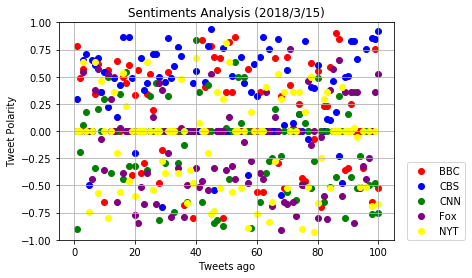

In [5]:
# Generate plot

BBC_dot = plt.scatter(sentiments_df.index+1, sentiments_df["BBC"], color="red", label="BBC")
CBS_dot = plt.scatter(sentiments_df.index+1, sentiments_df["CBS"], color="blue", label="CBS")
CNN_dot = plt.scatter(sentiments_df.index+1, sentiments_df["CNN"], color="Green", label="CNN")
Fox_dot = plt.scatter(sentiments_df.index+1, sentiments_df["Fox"], color="purple", label="Fox")
NYT_dot = plt.scatter(sentiments_df.index+1, sentiments_df["NYT"], color="yellow", label="NYT")



# Create a legend for our chart
plt.legend(handles=[BBC_dot, CBS_dot, CNN_dot, Fox_dot,NYT_dot], bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
plt.xlim(0-5, 100+5)
plt.ylim(-1, 1)
plt.title("Sentiments Analysis (2018/3/15)")
plt.grid()
plt.xlabel("Tweets ago")
plt.ylabel("Tweet Polarity")
plt.savefig("Sentiments Analysis.png")
plt.show()

In [6]:
Overall_list= []
BBC_Overall= round(np.mean(sentiments_df["BBC"]),2)
CBS_Overall= round(np.mean(sentiments_df["CBS"]),2)
CNN_Overall= round(np.mean(sentiments_df["CNN"]),2)
Fox_Overall= round(np.mean(sentiments_df["Fox"]),2)
NYT_Overall= round(np.mean(sentiments_df["NYT"]),2)


Overall_list.append({"BBC":BBC_Overall, 
                     "CBS":CBS_Overall,
                     "CNN":CNN_Overall,
                     "Fox":Fox_Overall,
                     "NYT":NYT_Overall })

overall_df = pd.DataFrame.from_dict(Overall_list)
overall_df


,BBC,CBS,CNN,Fox,NYT
0,0.13,0.32,-0.13,-0.15,-0.09


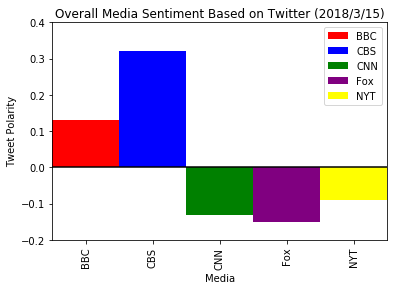

In [8]:
# Generate a bar by dataframe
overall_df.plot.bar(color=['red', 'blue', 'green', 'purple', 'yellow'], alpha=1)
plt.axhline(y=0, color='black', linestyle='-')
plt.title("Overall Media Sentiment Based on Twitter (2018/3/15)")
plt.xlabel("Media")
plt.ylabel("Tweet Polarity")
plt.legend(loc = "best")
tick_locations = [-0.2, -0.1, 0, 0.1, 0.2]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "Fox", "NYT"])
plt.xlim(-0.25, 0.25)
plt.ylim(-0.2, 0.4)
plt.savefig("Overall Media Sentiment.png")
plt.show()
# Reference from Activity
# x_axis = np.arange(len(overall_df.columns))
# tick_locations = [value+0.4 for value in x_axis]